>>> Loading dataset...
Dataset loaded with shape: (44898, 5)

>>> Preprocessing...

>>> Training model...

Model Accuracy: 98.69%

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      4284
           1       0.99      0.98      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



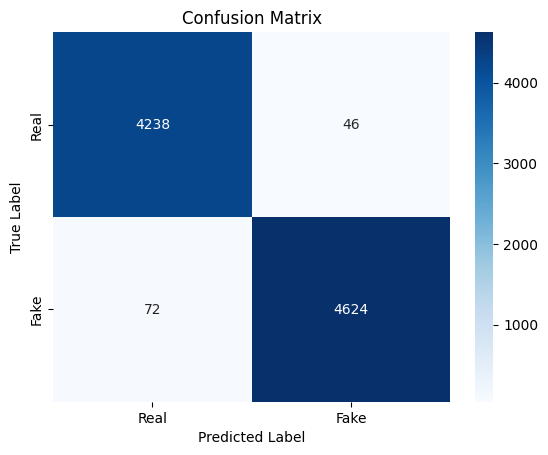


>>> Testing predictions:
News: The president signed a new economic policy today.
Prediction: FAKE

News: Aliens have landed in New York and are running for office!
Prediction: FAKE


In [16]:

# Importing libraries

import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn bits
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score
)


# Dataset Loading

def load_news_data(zip_file, output_dir):
    """
       Labels: 1 = Fake, 0 = Real

    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    with zipfile.ZipFile(zip_file, "r") as zf:
        zf.extractall(output_dir)

    fake = pd.read_csv(os.path.join(output_dir, "Fake.csv"))
    real = pd.read_csv(os.path.join(output_dir, "True.csv"))

    fake["label"] = 1
    real["label"] = 0

    combined_df = pd.concat([fake, real], ignore_index=True)
    return combined_df

# Preprocessing step

def preprocess_data(df):

    df["content"] = df["title"].astype(str) + " " + df["text"].astype(str)

    # return features (X) and labels (y)
    return df["content"], df["label"]

# Training function

def train_and_evaluate(X, y):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )

    tfidf = TfidfVectorizer(stop_words="english", max_df=0.7)
    X_train_tfidf = tfidf.fit_transform(X_train)
    X_test_tfidf = tfidf.transform(X_test)

    # logistic regression classifier
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train_tfidf, y_train)

    # quick evaluation
    preds = log_reg.predict(X_test_tfidf)
    acc = accuracy_score(y_test, preds)
    print("\nModel Accuracy: {:.2f}%".format(acc * 100))

    print("\nClassification Report:\n", classification_report(y_test, preds))

    # confusion matrix visualization
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(
        cm, annot=True, fmt="d", cmap="Blues",
        xticklabels=["Real", "Fake"],
        yticklabels=["Real", "Fake"]
    )
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return log_reg, tfidf

def classify_news(text, model, vectorizer):
    vec = vectorizer.transform([text])
    result = model.predict(vec)[0]

    return "FAKE" if result == 1 else "REAL"

# Main

if __name__ == "__main__":

    zip_file = "/content/archive (3).zip"
    out_dir = "/content/fake_news_dataset"

    print(">>> Loading dataset...")
    df = load_news_data(zip_file, out_dir)
    print("Dataset loaded with shape:", df.shape)

    print("\n>>> Preprocessing...")
    X, y = preprocess_data(df)

    print("\n>>> Training model...")
    model, vec = train_and_evaluate(X, y)


    print("\n>>> Testing predictions:")
    test1 = "The president signed a new economic policy today."
    test2 = "Aliens have landed in New York and are running for office!"

    print(f"News: {test1}\nPrediction: {classify_news(test1, model, vec)}")
    print(f"\nNews: {test2}\nPrediction: {classify_news(test2, model, vec)}")


